## Classification models

In [73]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import ConfusionMatrix

### Split dataset

In [4]:
df = pd.read_csv('Data/Dropout_Academic_Success.csv', delimiter=',')
feature_names = df.columns.tolist()
target_name = 'Target'
feature_names.remove(target_name)

X = df[feature_names]
Y = df[target_name]

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.125, random_state=42)

### Resample train dataset

In [32]:
sm = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = sm.fit_resample(X_train, Y_train)

### Confusion Matrix

In [5]:
def plot_confusion_matrix(classifier):
    visualizer = ConfusionMatrix(classifier)
    if classifier == "nb":
        visualizer.fit(X_train, Y_train) 
    else:
        visualizer.fit(X_train_val, Y_train_val)
    visualizer.score(X_test, Y_test)
    g = visualizer.poof()

### Model serialization & deserialization

In [76]:
def serialize_model(file_name, model):
    filename = f"models/{file_name}.pickle"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
        
def load_model(model_name):
    with open(filename, 'rb') as f:
        filename = f"models/{model_name}.pickle"
        loaded_model = pickle.load(f)
        return loaded_model

#### Store the best F1 score of each model

In [152]:
def save_f1_score(algorithm_name, f1, f1_weighted):
    if algorithm_name in f1_scores:
        if f1_weighted > f1_weighted_scores[algorithm_name]:
            f1_weighted_scores[algorithm_name] = f1_weighted
            f1_score[algorithm_name] = f1
            return True
    else:
        f1_weighted_scores[algorithm_name] = f1_weighted
        f1_scores[algorithm_name] = f1
        return True
    
    return False

### Naive Bayes - raw data

In [6]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_predictions = nb.predict(X_test)

In [7]:
ac = accuracy_score(Y_test, nb_predictions)
print("Accuracy score: ", ac.round(2))

p_sc = precision_score(Y_test, nb_predictions, average=None)
print("Precision score: ", p_sc.round(2))

r_sc = recall_score(Y_test, nb_predictions, average=None)
print("Recall score: ", r_sc.round(2))

f1_sc = f1_score(Y_test, nb_predictions, average=None)
print("F1 score: ", f1_sc.round(2))

Accuracy score:  0.7
Precision score:  [0.81 0.37 0.74]
Recall score:  [0.69 0.27 0.87]
F1 score:  [0.75 0.31 0.8 ]


In [8]:
print(classification_report(Y_test, nb_predictions))

              precision    recall  f1-score   support

     Dropout       0.81      0.69      0.75       128
    Enrolled       0.37      0.27      0.31        85
    Graduate       0.74      0.87      0.80       230

    accuracy                           0.70       443
   macro avg       0.64      0.61      0.62       443
weighted avg       0.69      0.70      0.69       443



/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


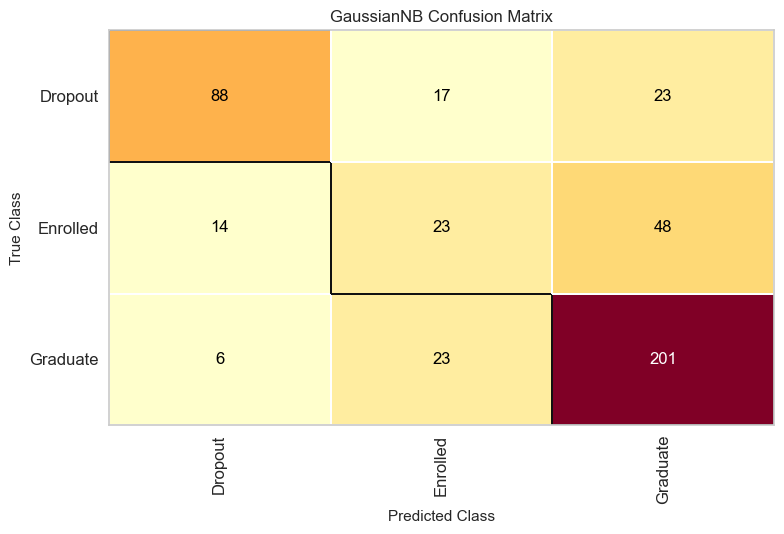

In [9]:
visualizer = ConfusionMatrix(nb)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)
g = visualizer.poof()

### Most relevant features

In [120]:
best_ranked_features = [
    'Curricular units 2nd sem (grade)', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (credited)', 
    'Curricular units 1st sem (credited)', 
    'Curricular units 2nd sem (approved)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 2nd sem (without evaluations)', 
    'Curricular units 1st sem (without evaluations)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (enrolled)', 
    'Curricular units 1st sem (enrolled)',
    'Admission grade', 
    'Application mode', 
    'Application order', 
    'Course',
    'Previous qualification (grade)', 
    'Tuition fees up to date'
]

X_train_resampled = X_train_resampled[best_ranked_features]
X_train = X_train_resampled
Y_train = Y_train_resampled
X_val = X_val[best_ranked_features]
X_test = X_test[best_ranked_features]

X_train_val, Y_train_val = pd.concat([X_train_resampled, X_val]), pd.concat([Y_train_resampled, Y_val])

f1_scores = {}
f1_weighted_scores = {}

### Naive Bayes

In [226]:
from sklearn.naive_bayes import GaussianNB

# Train model
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_predictions = nb.predict(X_test)

#Evaluate model
ac = accuracy_score(Y_test, nb_predictions)
print("Accuracy score: ", ac.round(2))

p_sc = precision_score(Y_test, nb_predictions, average=None)
print("Precision score: ", p_sc.round(2))

r_sc = recall_score(Y_test, nb_predictions, average=None)
print("Recall score: ", r_sc.round(2))

f1_sc = f1_score(Y_test, nb_predictions, average=None)
print("F1 score: ", f1_sc.round(2))

f1_weighted = f1_score(Y_test, nb_predictions, average='weighted')
print("F1 score weighted: ", f1_weighted.round(2))

Accuracy score:  0.59
Precision score:  [0.83 0.3  0.78]
Recall score:  [0.62 0.64 0.56]
F1 score:  [0.71 0.4  0.65]
F1 score weighted:  0.62


In [227]:
print(classification_report(Y_test, nb_predictions))

              precision    recall  f1-score   support

     Dropout       0.83      0.62      0.71       128
    Enrolled       0.30      0.64      0.40        85
    Graduate       0.78      0.56      0.65       230

    accuracy                           0.59       443
   macro avg       0.64      0.60      0.59       443
weighted avg       0.70      0.59      0.62       443



/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


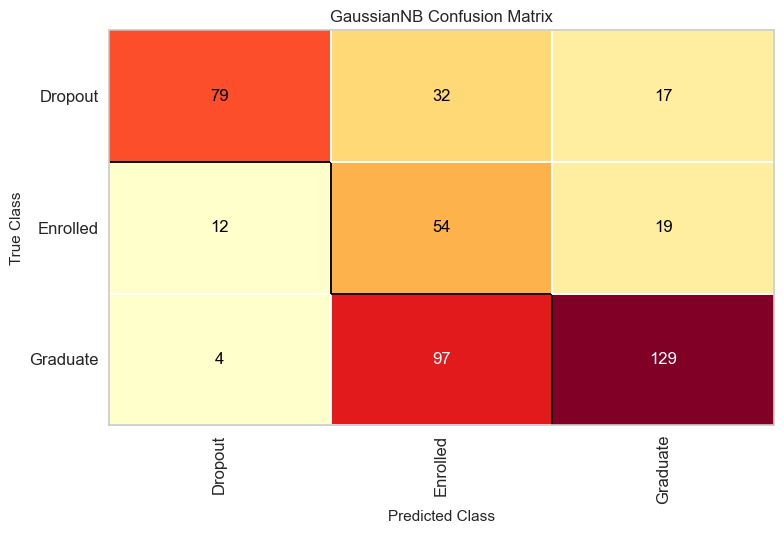

In [228]:
plot_confusion_matrix(nb)

In [241]:
if save_f1_score('Naive Bayes', f1_sc, f1_weighted):
    serialize_model('nb', nb)

### Logistic regression

In [230]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# hyperparameters for grid search
param_grid = {'penalty': ['l1', 'l2'],
              'C': np.logspace(-3,3,7),
              'solver': ['liblinear', 'saga']}

# Train model on train subset
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_micro')
grid_search.fit(X_train, Y_train)
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on validation subset
log_reg_prediction = grid_search.predict(X_val)
print('F1 score on validation set: ', f1_score(Y_val, log_reg_prediction,  average=None))

# Train model on train & validation subsets using best hyperparameters
log_reg_optimized = LogisticRegression(**grid_search.best_params_)
log_reg_optimized.fit(X_train_val, Y_train_val)

# Evaluate final model on test subset
log_reg_optimized_prediction = log_reg_optimized.predict(X_test)
print('F1 score on test set: ', f1_score(Y_test, log_reg_optimized_prediction,  average=None))

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best hyperparameters:  {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
F1 score on validation set:  [0.73800738 0.4432133  0.82583622]
F1 score on test set:  [0.76521739 0.47513812 0.84210526]


In [231]:
print(classification_report(Y_val, log_reg_prediction))

              precision    recall  f1-score   support

     Dropout       0.88      0.63      0.74       316
    Enrolled       0.38      0.53      0.44       151
    Graduate       0.80      0.86      0.83       418

    accuracy                           0.72       885
   macro avg       0.69      0.67      0.67       885
weighted avg       0.76      0.72      0.73       885



In [232]:
print(classification_report(Y_test, log_reg_optimized_prediction))

              precision    recall  f1-score   support

     Dropout       0.86      0.69      0.77       128
    Enrolled       0.45      0.51      0.48        85
    Graduate       0.82      0.87      0.84       230

    accuracy                           0.75       443
   macro avg       0.71      0.69      0.69       443
weighted avg       0.76      0.75      0.75       443



/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


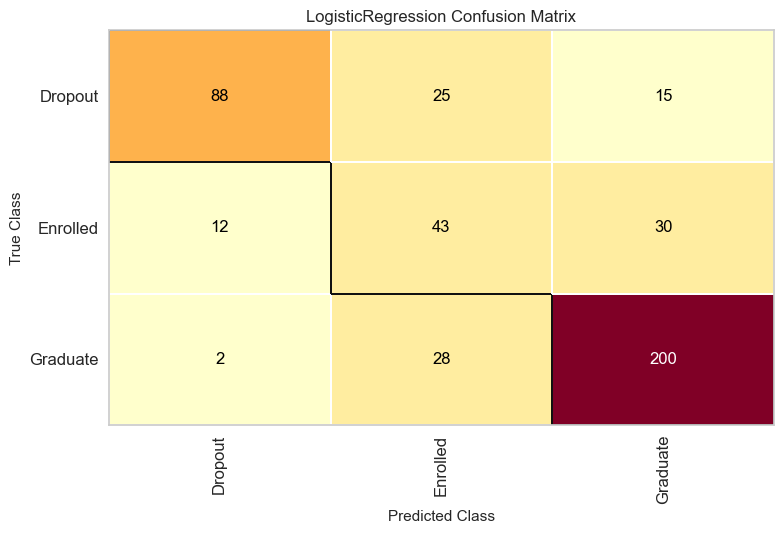

In [233]:
plot_confusion_matrix(log_reg_optimized)

In [242]:
f1_sc = f1_score(Y_test, log_reg_optimized_prediction, average=None)
f1_weighted = f1_score(Y_test, log_reg_optimized_prediction, average='weighted')
if save_f1_score('Logistic Regression', f1_sc, f1_weighted):
    serialize_model('log_reg', log_reg_optimized)

### Decision tree

In [235]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

param_grid = {'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(dt_classifier, params, cv=5, n_jobs=-1, scoring='f1_micro')
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

dt_classifier_prediction = grid_search.predict(X_val)
print("Validation F1 score: ", f1_score(Y_val, dt_classifier_prediction, average=None))

# Train the Decision Tree using the best hyperparameters on the training & validation data
dt_classifier_optimized = DecisionTreeClassifier(**best_params)
dt_classifier_optimized.fit(X_train_val, Y_train_val)

dt_classifier_optimized_prediction = dt_classifier_optimized.predict(X_test)
print("Test F1 score: ", f1_score(Y_test, dt_classifier_optimized_prediction, average=None))

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Validation F1 score:  [0.7238422  0.43324937 0.77468354]
Test F1 score:  [0.6835443  0.43298969 0.81758242]


In [236]:
print(classification_report(Y_val, dt_classifier_prediction))

              precision    recall  f1-score   support

     Dropout       0.79      0.67      0.72       316
    Enrolled       0.35      0.57      0.43       151
    Graduate       0.82      0.73      0.77       418

    accuracy                           0.68       885
   macro avg       0.65      0.66      0.64       885
weighted avg       0.73      0.68      0.70       885



In [237]:
print(classification_report(Y_test, dt_classifier_optimized_prediction))

              precision    recall  f1-score   support

     Dropout       0.74      0.63      0.68       128
    Enrolled       0.39      0.49      0.43        85
    Graduate       0.83      0.81      0.82       230

    accuracy                           0.70       443
   macro avg       0.65      0.65      0.64       443
weighted avg       0.72      0.70      0.71       443



/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


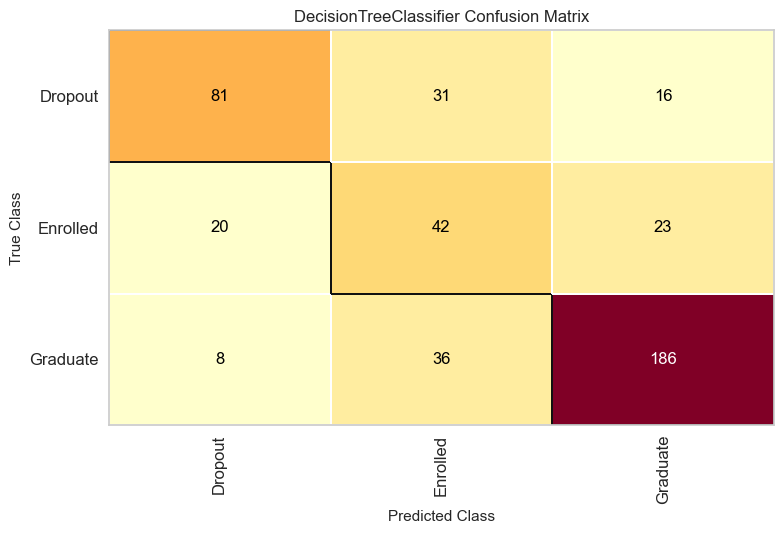

In [238]:
plot_confusion_matrix(dt_classifier_optimized)

In [243]:
f1_sc = f1_score(Y_test, dt_classifier_optimized_prediction, average=None)
f1_weighted = f1_score(Y_test, dt_classifier_optimized_prediction, average='weighted')
if save_f1_score('Decision Tree', f1_sc, f1_weighted):
    serialize_model('dt', dt_classifier_optimized)

### Bagging classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(estimator=base_classifier)

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],
    "bootstrap": [True, False],
    "bootstrap_features": [True, False]
}

grid_search = GridSearchCV(bagging_classifier, param_grid=param_grid, scoring='f1_micro')
grid_search.fit(X_train, Y_train)

bagging_classifier_prediction = grid_search.predict(X_val)
print("Validation F1 score: ", f1_score(Y_val, bagging_classifier_prediction, average=None))

print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)
best_bagging_classifier = grid_search.best_estimator_

# Evaluate model on the test set
bagging_classifier_optimized_prediction = best_bagging_classifier.predict(X_test)
print("Test F1 score: ", f1_score(Y_test, bagging_classifier_optimized_prediction, average=None))

Validation F1 score:  [0.75465313 0.44047619 0.83274021]
Best hyperparameters:  {'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.9, 'max_samples': 0.7, 'n_estimators': 30}
Best F1 score:  0.8294007516259384
Test F1 score:  [0.71966527 0.45054945 0.82150538]


In [96]:
print(classification_report(Y_val, bagging_classifier_prediction))

              precision    recall  f1-score   support

     Dropout       0.81      0.71      0.75       316
    Enrolled       0.40      0.49      0.44       151
    Graduate       0.83      0.84      0.83       418

    accuracy                           0.73       885
   macro avg       0.68      0.68      0.68       885
weighted avg       0.75      0.73      0.74       885



In [97]:
print(classification_report(Y_test, bagging_classifier_optimized_prediction))

              precision    recall  f1-score   support

     Dropout       0.77      0.67      0.72       128
    Enrolled       0.42      0.48      0.45        85
    Graduate       0.81      0.83      0.82       230

    accuracy                           0.72       443
   macro avg       0.67      0.66      0.66       443
weighted avg       0.73      0.72      0.72       443



/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


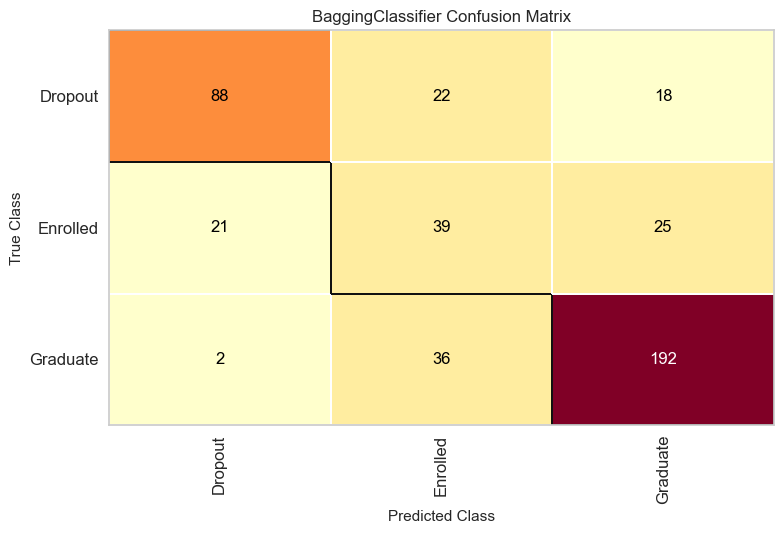

In [56]:
plot_confusion_matrix(best_bagging_classifier)

In [245]:
f1_sc = f1_score(Y_test, bagging_classifier_optimized_prediction, average=None)
f1_weighted = f1_score(Y_test, bagging_classifier_optimized_prediction, average='weighted')
if save_f1_score('Bagging', f1_sc, f1_weighted):
    serialize_model('bagging', best_bagging_classifier)

### Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1, scoring=None)
grid_rf.fit(X_train, Y_train)

print("Best parameters: ", grid_rf.best_params_)
print("Best F1 score: ", grid_rf.best_score_)

# Train the final model with the best parameters on the combined training and validation data
rf_classifier_optimized = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
rf_classifier_optimized.fit(X_train_val, Y_train_val)

# Evaluate the final model on the test set
rf_classifier_optimized_prediction = rf_classifier_optimized.predict(X_test)
print("Test F1 score: ", f1_score(Y_test, rf_classifier_optimized_prediction, average=None))

Best parameters:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 score:  0.8349576754325956
Test F1 score:  [0.74897119 0.46987952 0.8427673 ]


In [100]:
print(classification_report(Y_test, rf_classifier_optimized_prediction))

              precision    recall  f1-score   support

     Dropout       0.79      0.71      0.75       128
    Enrolled       0.48      0.46      0.47        85
    Graduate       0.81      0.87      0.84       230

    accuracy                           0.75       443
   macro avg       0.70      0.68      0.69       443
weighted avg       0.74      0.75      0.74       443



/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


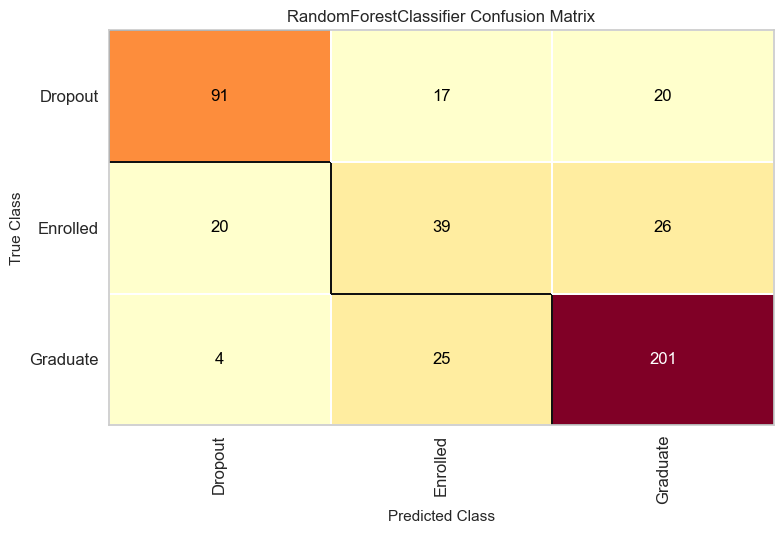

In [102]:
plot_confusion_matrix(rf_classifier_optimized)

In [246]:
f1_sc = f1_score(Y_test, rf_classifier_optimized_prediction, average=None)
f1_weighted = f1_score(Y_test, rf_classifier_optimized_prediction, average='weighted')
if save_f1_score('Random Forest', f1_sc, f1_weighted):
    serialize_model('rf', rf_classifier_optimized)

### Ada Boost

In [105]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_classifier = AdaBoostClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(ada_boost_classifier, param_grid=param_grid, scoring='f1_micro')
grid_search.fit(X_train, Y_train)

best_ada_boost_estimator = grid_search.best_estimator_

y_val_pred = best_ada_boost_estimator.predict(X_val)
print("Validation F1 score: ", f1_score(Y_val, y_val_pred, average=None))

best_ada_boost_estimator_prediction = best_ada_boost_estimator.predict(X_test)
print("Test F1 score: ", f1_score(Y_test, best_ada_boost_estimator_prediction, average=None))

Validation F1 score:  [0.72694394 0.42818428 0.83726415]
Test F1 score:  [0.69868996 0.4321608  0.82532751]


In [106]:
print(classification_report(Y_test, best_ada_boost_estimator_prediction))

              precision    recall  f1-score   support

     Dropout       0.79      0.62      0.70       128
    Enrolled       0.38      0.51      0.43        85
    Graduate       0.83      0.82      0.83       230

    accuracy                           0.70       443
   macro avg       0.67      0.65      0.65       443
weighted avg       0.73      0.70      0.71       443



/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


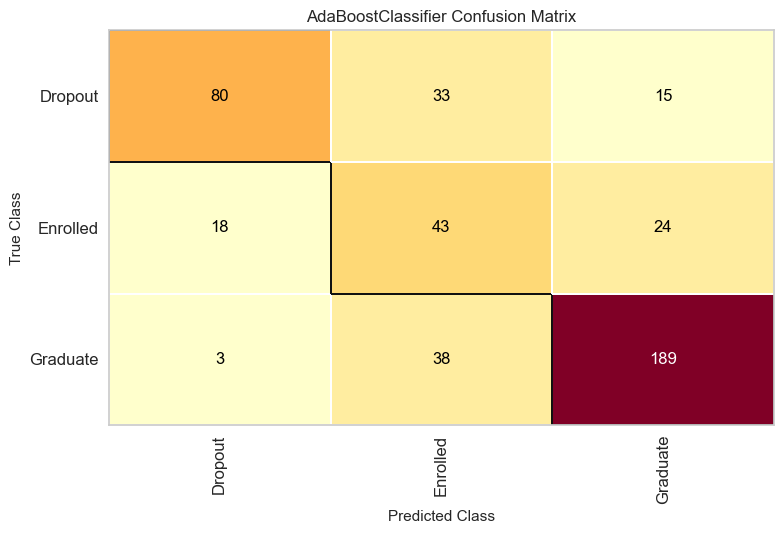

In [107]:
plot_confusion_matrix(best_ada_boost_estimator)

In [247]:
f1_sc = f1_score(Y_test, best_ada_boost_estimator_prediction, average=None)
f1_weighted = f1_score(Y_test, best_ada_boost_estimator_prediction, average='weighted')
if save_f1_score('Ada Boost', f1_sc, f1_weighted):
    serialize_model('ada-boost', best_ada_boost_estimator)

### Gradient Boosting

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier()

param_grid = {
    'learning_rate' : [0.01, 0.1, 1, 10, 100],
    'n_estimators': [10, 100, 250, 500],
    'max_depth': [1, 3, 5, 7, 9]
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search.fit(X_train, Y_train)

print("Best parameters: ", grid_search.best_params_)
gradient_boosting_prediction = grid_search.predict(X_val)
print("Validation F1 score: ", f1_score(Y_val, gradient_boosting_prediction, average=None))

gradient_boosting_optimized = GradientBoostingClassifier(**grid_search.best_params_)
gradient_boosting_optimized.fit(X_train_val, Y_train_val)
gradient_boosting_optimized_prediction = gradient_boosting_optimized.predict(X_test)
print("Test F1 score: ", f1_score(Y_test, gradient_boosting_optimized_prediction, average=None))

Best parameters:  {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 500}
Validation F1 score:  [0.72605042 0.36912752 0.82326112]
Test F1 score:  [0.75303644 0.45962733 0.84100418]


In [110]:
print(classification_report(Y_val, gradient_boosting_prediction))

              precision    recall  f1-score   support

     Dropout       0.77      0.68      0.73       316
    Enrolled       0.37      0.36      0.37       151
    Graduate       0.79      0.86      0.82       418

    accuracy                           0.71       885
   macro avg       0.64      0.64      0.64       885
weighted avg       0.71      0.71      0.71       885



In [111]:
print(classification_report(Y_test, gradient_boosting_optimized_prediction))

              precision    recall  f1-score   support

     Dropout       0.78      0.73      0.75       128
    Enrolled       0.49      0.44      0.46        85
    Graduate       0.81      0.87      0.84       230

    accuracy                           0.75       443
   macro avg       0.69      0.68      0.68       443
weighted avg       0.74      0.75      0.74       443



/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


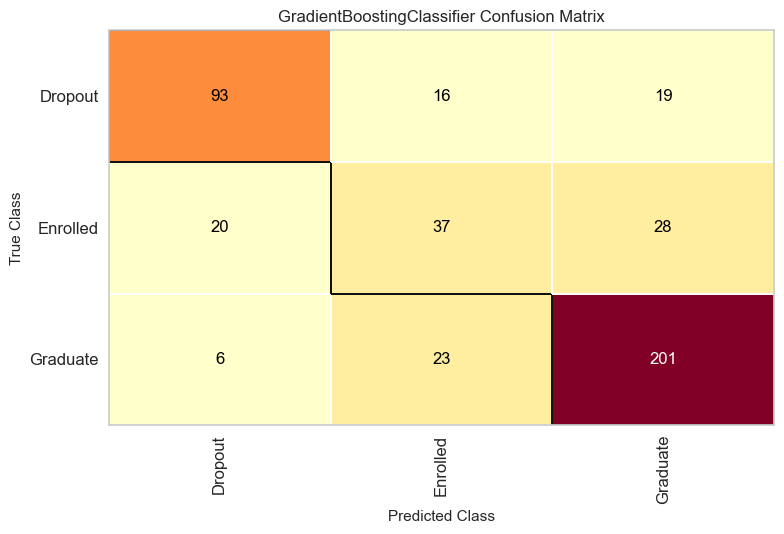

In [112]:
plot_confusion_matrix(gradient_boosting_optimized)

In [248]:
f1_sc = f1_score(Y_test, gradient_boosting_optimized_prediction, average=None)
f1_weighted = f1_score(Y_test, gradient_boosting_optimized_prediction, average='weighted')
if save_f1_score('Gradient Boosting', f1_sc, f1_weighted):
    serialize_model('gradient-boosting', gradient_boosting_optimized)

### Neural network

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def build_clf(unit):
  # creating the layers of the NN
  ann = Sequential()
  ann.add(Dense(units=unit, activation='relu'))
  ann.add(Dense(units=unit, activation='relu'))
  ann.add(Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann


model=KerasClassifier(build_fn=build_clf)

params={
    'batch_size':[20, 25, 32, 50, 100],
    'nb_epoch':[100, 200, 300, 400],
    'unit':[5, 6, 10, 11, 12, 15]
}

gs=GridSearchCV(estimator=model, param_grid=params, cv=10)
id_result = gs.fit(X_train, Y_train)

/var/folders/tn/wjp_97vx7yg_6qh2qztx6z0w0000gn/T/ipykernel_5423/4230019343.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=build_clf)


4/4 [==============================] - 0s 2ms/step - loss: -270.0671 - accuracy: 0.1806


4/4 [==============================] - 0s 2ms/step - loss: -151.7399 - accuracy: 0.1581


4/4 [==============================] - 0s 2ms/step - loss: 0.8316 - accuracy: 0.2104


4/4 [==============================] - 0s 2ms/step - loss: -94.8104 - accuracy: 0.2097


4/4 [==============================] - 0s 2ms/step - loss: -360.6000 - accuracy: 0.2071


140/140 [==============================] - 1s 987us/step - loss: -1130.4426 - accuracy: 0.1805


16/16 [==============================] - 0s 1ms/step - loss: 2.3627 - accuracy: 0.1715


140/140 [==============================] - 1s 986us/step - loss: -133.7502 - accuracy: 0.1770


16/16 [==============================] - 0s 1ms/step - loss: -1370.7217 - accuracy: 0.2039


140/140 [==============================] - 1s 1ms/step - loss: -189.8688 - accuracy: 0.1820


56/56 [==============================] - 1s 1ms/step - loss: -616.3377 - accuracy: 0.1776


56/56 [==============================] - 1s 1ms/step - loss: -181.3412 - accuracy: 0.1802


56/56 [==============================] - 1s 1ms/step - loss: -190.3251 - accuracy: 0.1773


56/56 [==============================] - 1s 1ms/step - loss: -500.8166 - accuracy: 0.1802


56/56 [==============================] - 1s 1ms/step - loss: 69.6520 - accuracy: 0.2444


112/112 [==============================] - 1s 1ms/step - loss: 335.3310 - accuracy: 0.2698


13/13 [==============================] - 0s 1ms/step - loss: -189.1814 - accuracy: 0.1581


13/13 [==============================] - 0s 1ms/step - loss: -554.5928 - accuracy: 0.1553


13/13 [==============================] - 0s 1ms/step - loss: -893.3976 - accuracy: 0.1581


112/112 [==============================] - 1s 984us/step - loss: -88.4234 - accuracy: 0.1830


112/112 [==============================] - 1s 985us/step - loss: -1151.3335 - accuracy: 0.1827


10/10 [==============================] - 0s 1ms/step - loss: -112.6351 - accuracy: 0.1553


88/88 [==============================] - 1s 1ms/step - loss: 203.9317 - accuracy: 0.3144


10/10 [==============================] - 0s 1ms/step - loss: 3.9936 - accuracy: 0.3074


88/88 [==============================] - 1s 1ms/step - loss: -4.4632 - accuracy: 0.2096


10/10 [==============================] - 0s 1ms/step - loss: -1443.8187 - accuracy: 0.1618


31/31 [==============================] - 1s 1ms/step - loss: 572.6856 - accuracy: 0.3143


NameError: name 'grid_result' is not defined

In [29]:
print(f"Best accuracy score: {id_result.best_score_:.4f}")
print(f"Best hyperparameters: {id_result.best_params_}")

best_model = id_result.best_estimator_.model
y_pred = best_model.predict(X_test)
print(classification_report(Y_test, y_pred))

Best accuracy score: 0.2716
Best hyperparameters: {'batch_size': 100, 'nb_epoch': 200, 'unit': 6}
14/14 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

### Compare algorithms

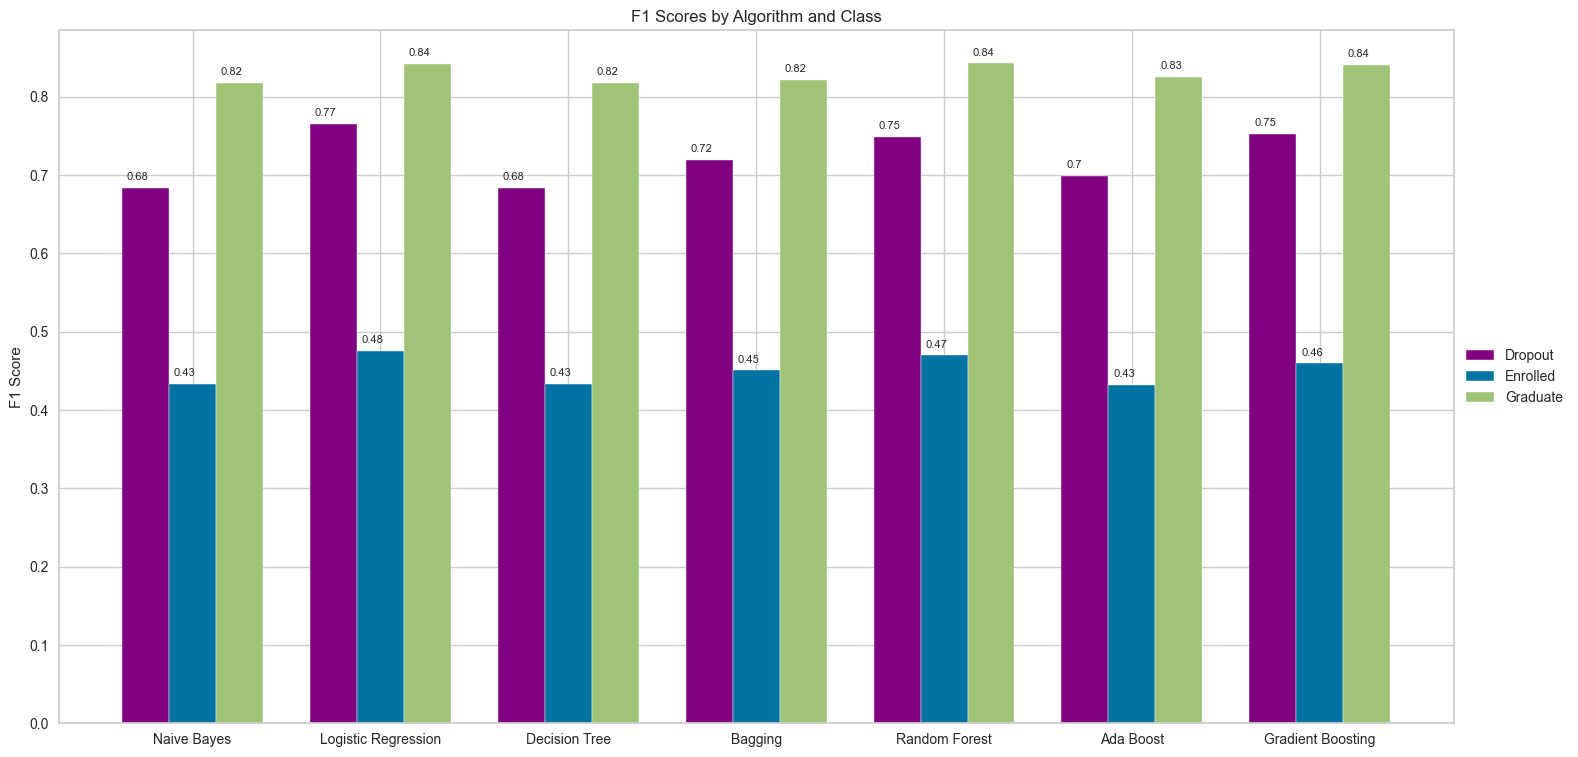

In [249]:
f1_scores_arr = np.array([v for k, v in f1_scores.items()]).T
algorithms = list(f1_scores.keys())
classes = ['Dropout', 'Enrolled', 'Graduate']

bar_width = 0.25

r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

fig, ax = plt.subplots(figsize=(18, 9))

plt.bar(r1, f1_scores_arr[0], width=bar_width, color='purple', edgecolor='white', label=classes[0])
plt.bar(r2, f1_scores_arr[1], width=bar_width,  edgecolor='white', label=classes[1])
plt.bar(r3, f1_scores_arr[2], width=bar_width,  edgecolor='white', label=classes[2])

plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('F1 Score')
plt.title('F1 Scores by Algorithm and Class')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for i, v in enumerate(f1_scores_arr.flatten()):
    plt.text(i % len(algorithms) - 0.1 + (i // len(algorithms)) * bar_width, v + 0.01, str(round(v, 2)), fontsize=8)

plt.show()